# Medical Cost
* Building a regression neural network to make predictions on personal medical cost using [this](https://www.kaggle.com/mirichoi0218/insurance) dataset from [Kaggle](https://www.kaggle.com/)

In [1]:
# Imports
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# Fetch the data from Github
insurence_data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurence_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Preprocessing data (normalization and standardization)

In [3]:
# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn values betw. 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [4]:
# Create features and labels

X = insurence_data.drop('charges', axis=1)
y = insurence_data['charges']

X.head(3), y.head(3)

(   age     sex    bmi  children smoker     region
 0   19  female  27.90         0    yes  southwest
 1   18    male  33.77         1     no  southeast
 2   28    male  33.00         3     no  southeast,
 0    16884.9240
 1     1725.5523
 2     4449.4620
 Name: charges, dtype: float64)

In [5]:
# Create training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [6]:
# Fit column transformer to the training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [7]:
# Transform training and test data with normalization

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [8]:
# Looking at the data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [73]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Build the model

In [132]:
tf.random.set_seed(42)

insurence_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(33, activation="relu"),
  tf.keras.layers.Dense(1)
])

insurence_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.3),
                        metrics=['mae'])

trainingStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0,mode='auto', baseline=None, restore_best_weights=False)
history = insurence_model.fit(X_train_normal, y_train, epochs=1000, verbose=0, batch_size=32, callbacks=[trainingStopCallback])

In [133]:
# Evaluate the model
insurence_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1285.7281 - mae: 1285.7281


[1285.7281494140625, 1285.7281494140625]

Text(0.5, 0, 'epochs')

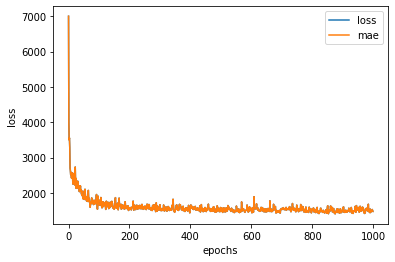

In [134]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')